In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)


from analysis import *
from modeling import *

In [2]:
def analysis(data_name, sheet_num):
    df, data_name = preprocessing(data_name, sheet_num)
    df = stationary(df)
    df = add_exogenous_features(df)
    df = analysing(df, data_name)

    return df, data_name


In [3]:
def model(df, data_name):
    #Create a scoring data frame and functiont to add score
    scores_dict = {"Model":[],"Test Score":[]}
    train, test = train_test_split(df)
    arima_model_name, arima_mae = arima_model(data_name, train, test)
    scores_dict['Model'].append(arima_model_name)
    scores_dict['Test Score'].append(arima_mae)

    sarima_model_name, sarima_mae = sarima_model(data_name, train, test)
    scores_dict['Model'].append(sarima_model_name)
    scores_dict['Test Score'].append(sarima_mae)

    arimax_model_name, arimax_mae = arimax_model(data_name, train, test)
    scores_dict['Model'].append(arimax_model_name)
    scores_dict['Test Score'].append(arimax_mae)
    X_train, y_train, X_val, y_val, X_test, y_test = train_valid_test_splt(df)
    LSTM_model_name, LSTM_model_mae = LSTM(X_train, y_train, X_val, y_val, X_test, y_test, data_name)
    scores_dict['Model'].append(LSTM_model_name)
    scores_dict['Test Score'].append(LSTM_model_mae)

    return scores(scores_dict)

The first 5 rows of the SBER data set: 

                  Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02   294.0  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

**************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.7582066363876819
The price values after difference: 
The time series is stationary and the p-value is 4.6146668027328215e-07


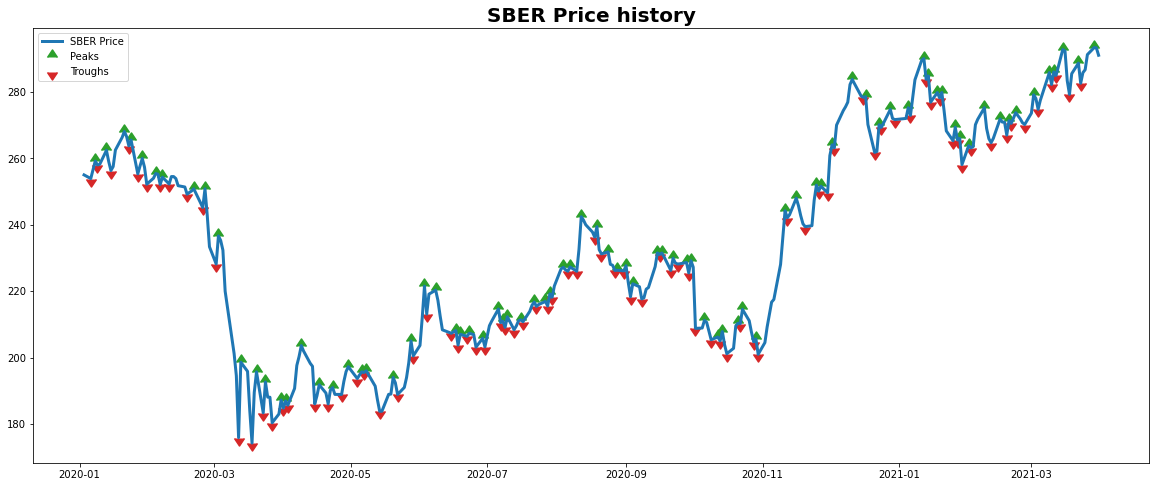

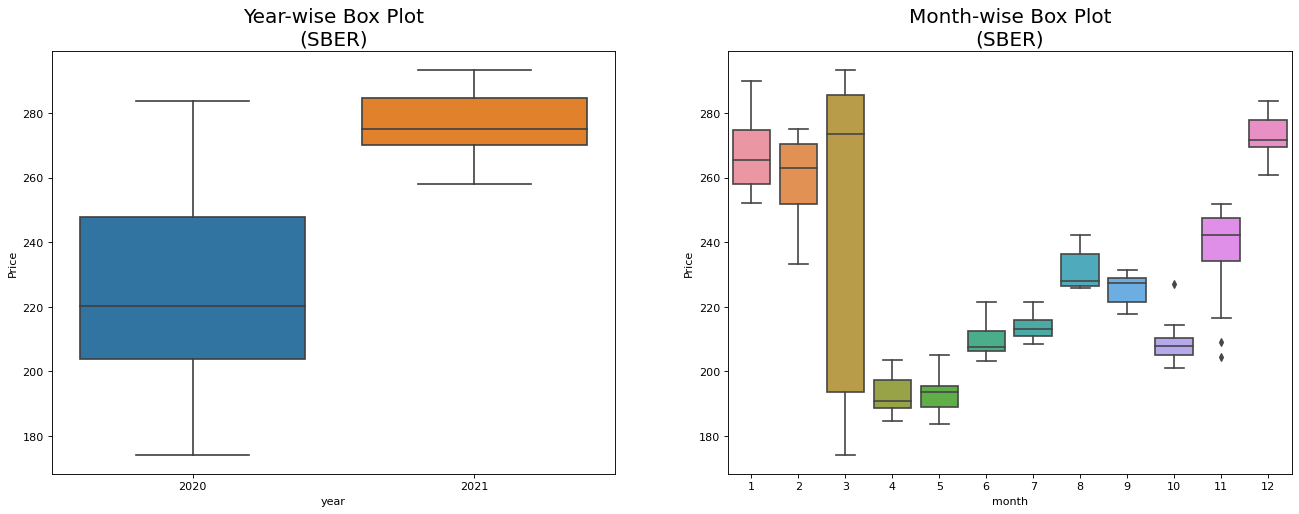

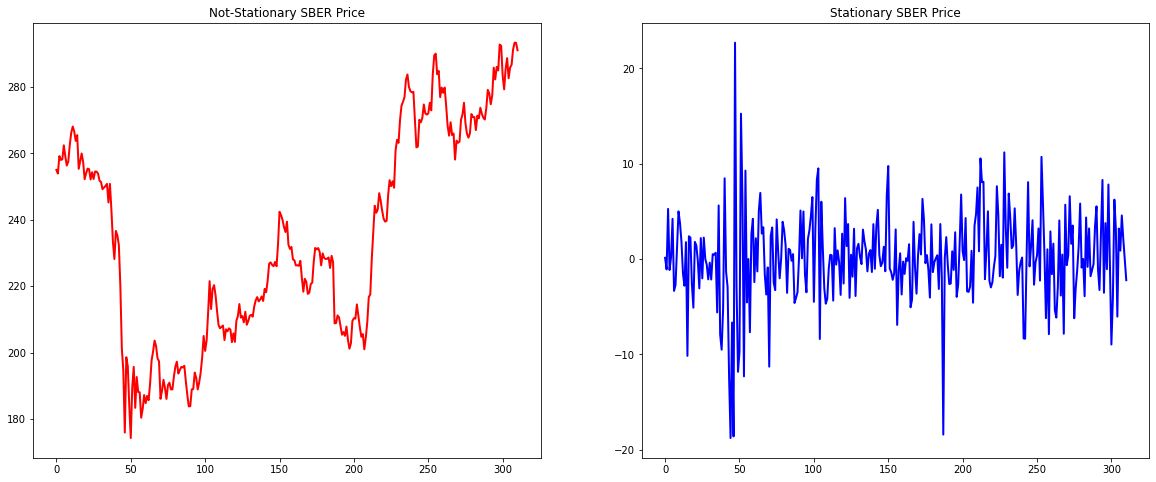

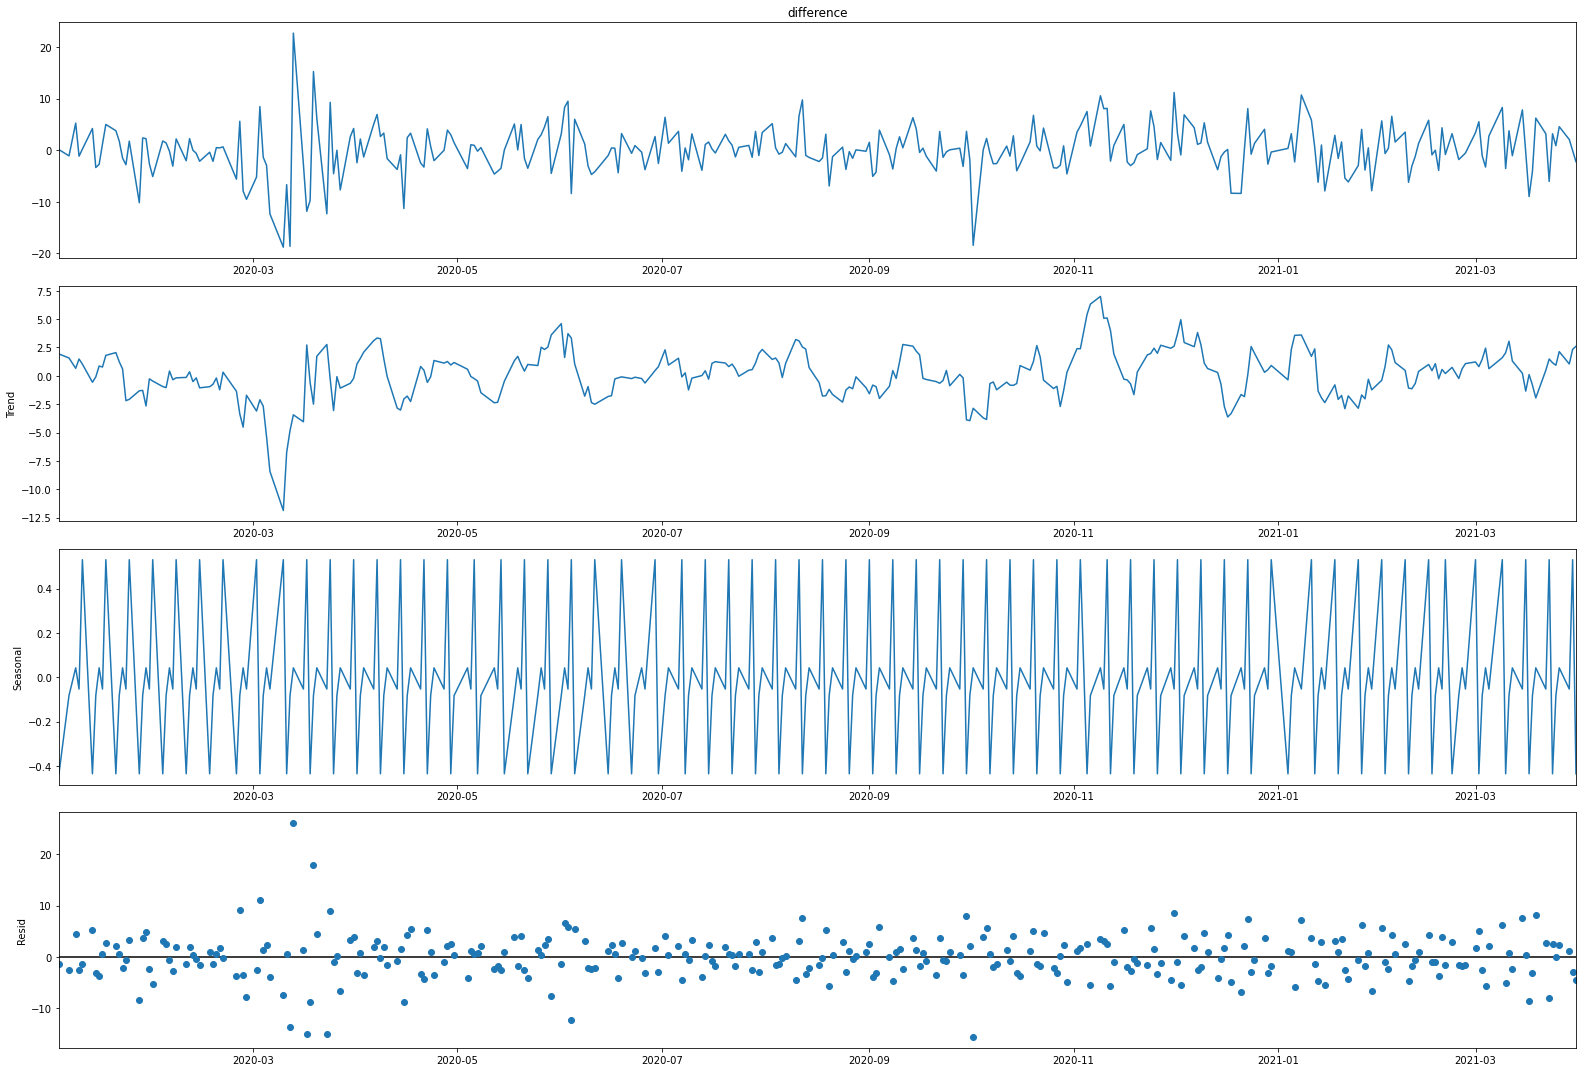

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'




##################################################


 SRART THE TRAINING


##################################################


Epoch 1/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.3004 
Epoch 00001: val_loss improved from inf to 0.15165, saving model to SBER_LSTM_MODEL.h5
13/13 [==============================] - 3s 58ms/step - loss: 0.2626 - val_loss: 0.1517
Epoch 2/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.1152
Epoch 00002: val_loss improved from 0.15165 to 0.09128, saving model to SBER_LSTM_MODEL.h5
13/13 [==============================] - 0s 11ms/step - loss: 0.1065 - val_loss: 0.0913
Epoch 3/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.0946
Epoch 00003: val_loss improved from 0.09128 to 0.08931, saving model to SBER_LSTM_MODEL.h5
13/13 [==============================] - 0s 13ms/step - loss: 0.0885 - val_loss: 0.0893
Epoch 4/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.0804
Epoch 00004: val_loss did no

Epoch 37/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.0888
Epoch 00037: val_loss improved from 0.08471 to 0.08444, saving model to SBER_LSTM_MODEL.h5
13/13 [==============================] - 0s 10ms/step - loss: 0.0860 - val_loss: 0.0844
Epoch 38/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.0810
Epoch 00038: val_loss did not improve from 0.08444
13/13 [==============================] - 0s 9ms/step - loss: 0.0827 - val_loss: 0.0845
Epoch 39/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.0808
Epoch 00039: val_loss did not improve from 0.08444
13/13 [==============================] - 0s 8ms/step - loss: 0.0841 - val_loss: 0.0879
Epoch 40/1000
10/13 [======================>.......] - ETA: 0s - loss: 0.0841
Epoch 00040: val_loss improved from 0.08444 to 0.08442, saving model to SBER_LSTM_MODEL.h5
13/13 [==============================] - 0s 10ms/step - loss: 0.0826 - val_loss: 0.0844
Epoch 41/1000
 9/13 [===================>..........] -

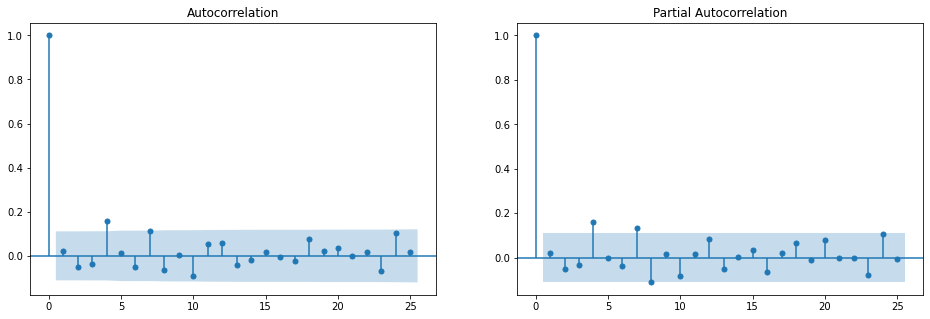

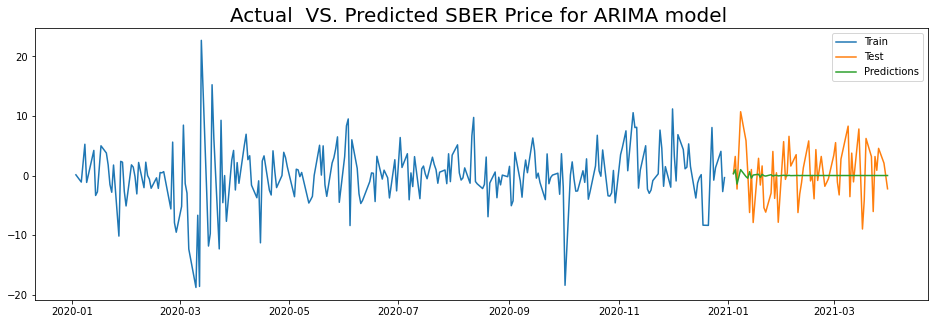

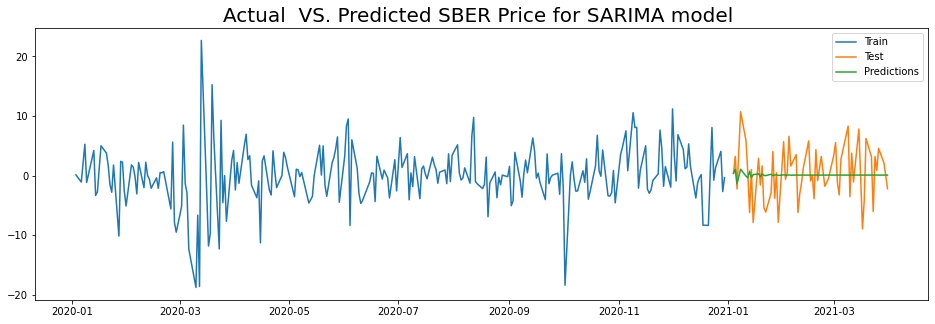

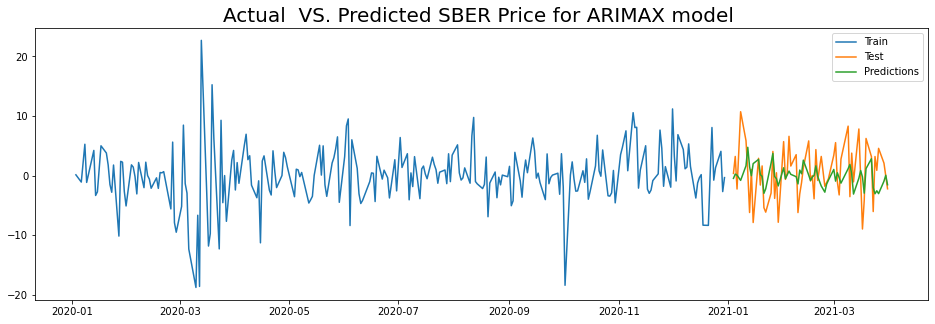

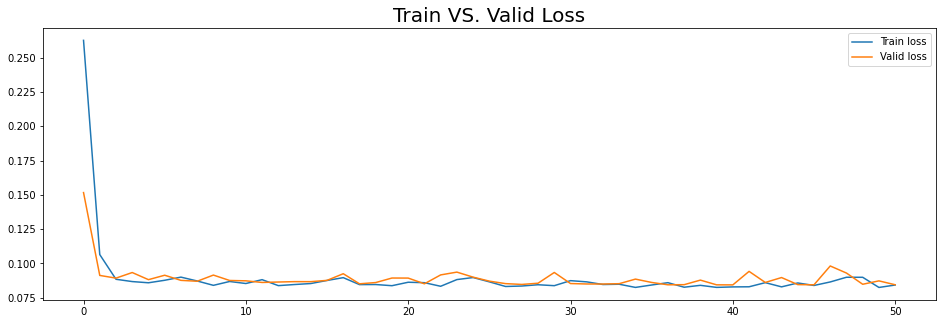

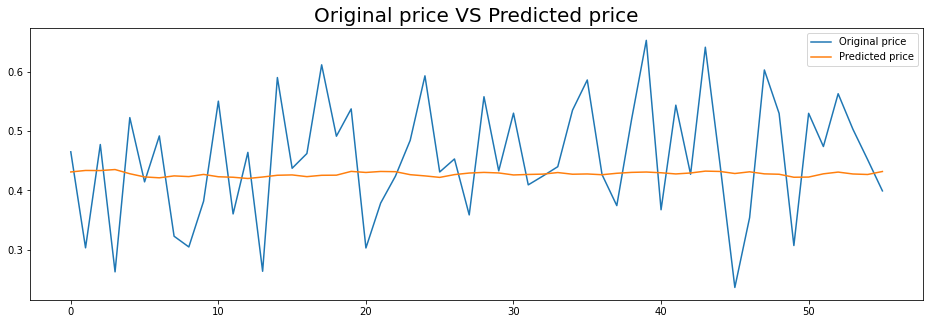

In [4]:
SBER, data_name = analysis('SBER', 0)
SBER_models_scores = model(SBER, data_name)

In [5]:
SBER_models_scores

,Model,Test Score
0,SBER ARIMA Model,3.398926
1,SBER SARIMA Model,3.398223
2,SBER ARIMAX Model,3.332440
3,SBER LSTM Model,0.083599


---

The first 5 rows of the KCHOL data set: 

                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

**************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.5784799525388543
The price values after difference: 
The time series is stationary and the p-value is 7.543884362997793e-11


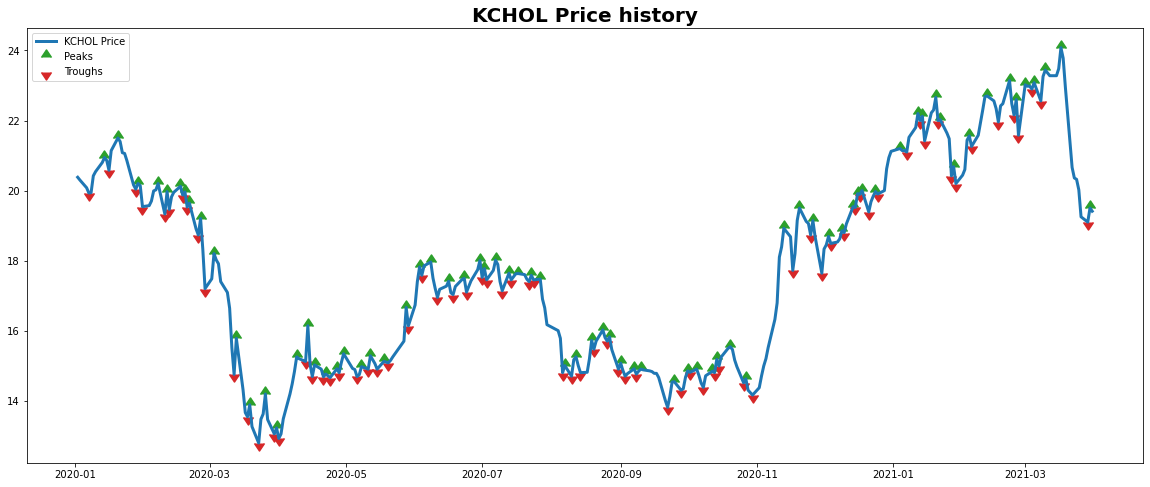

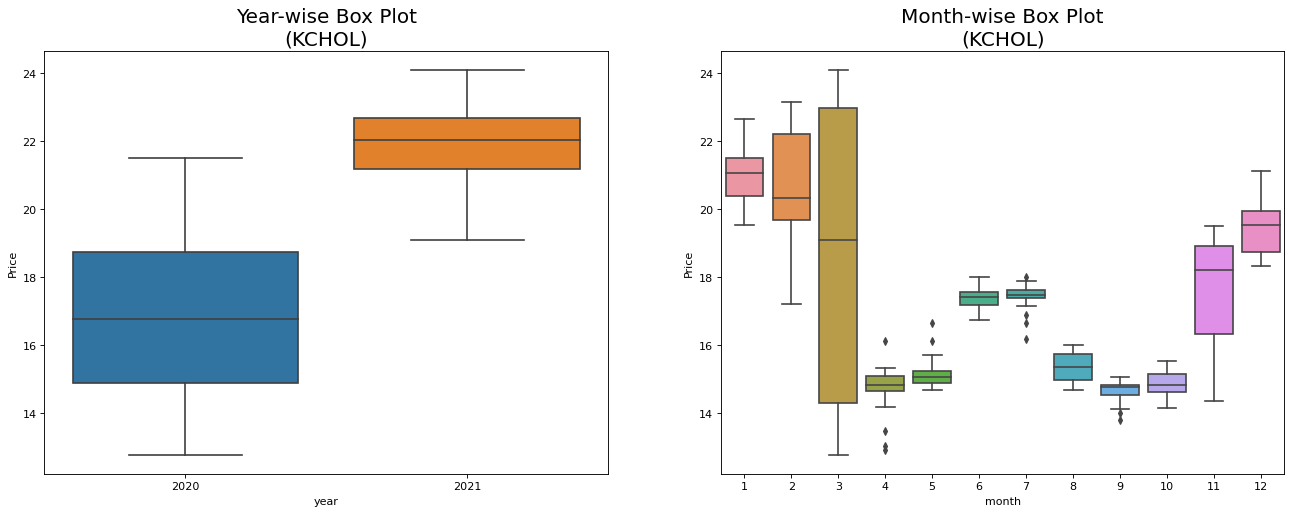

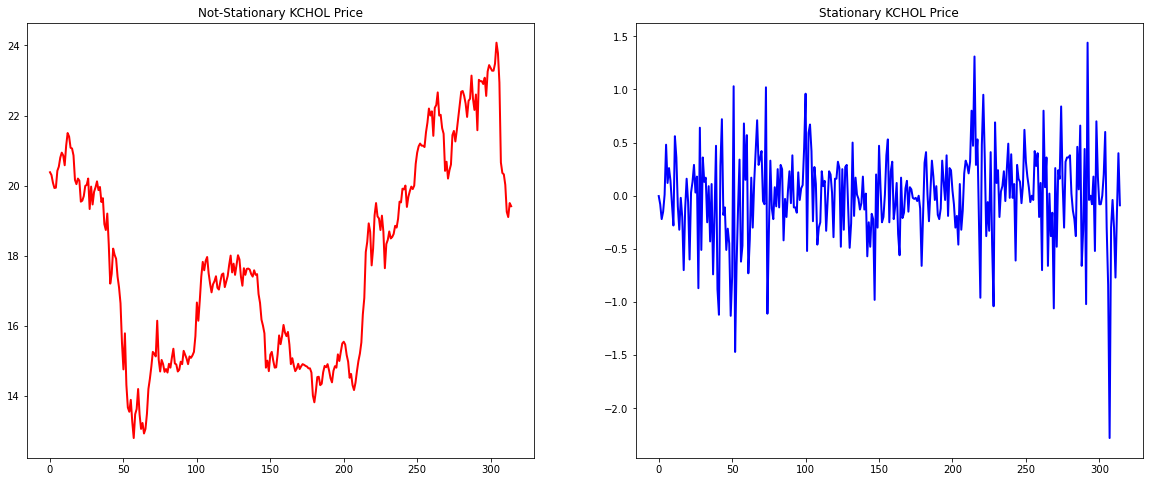

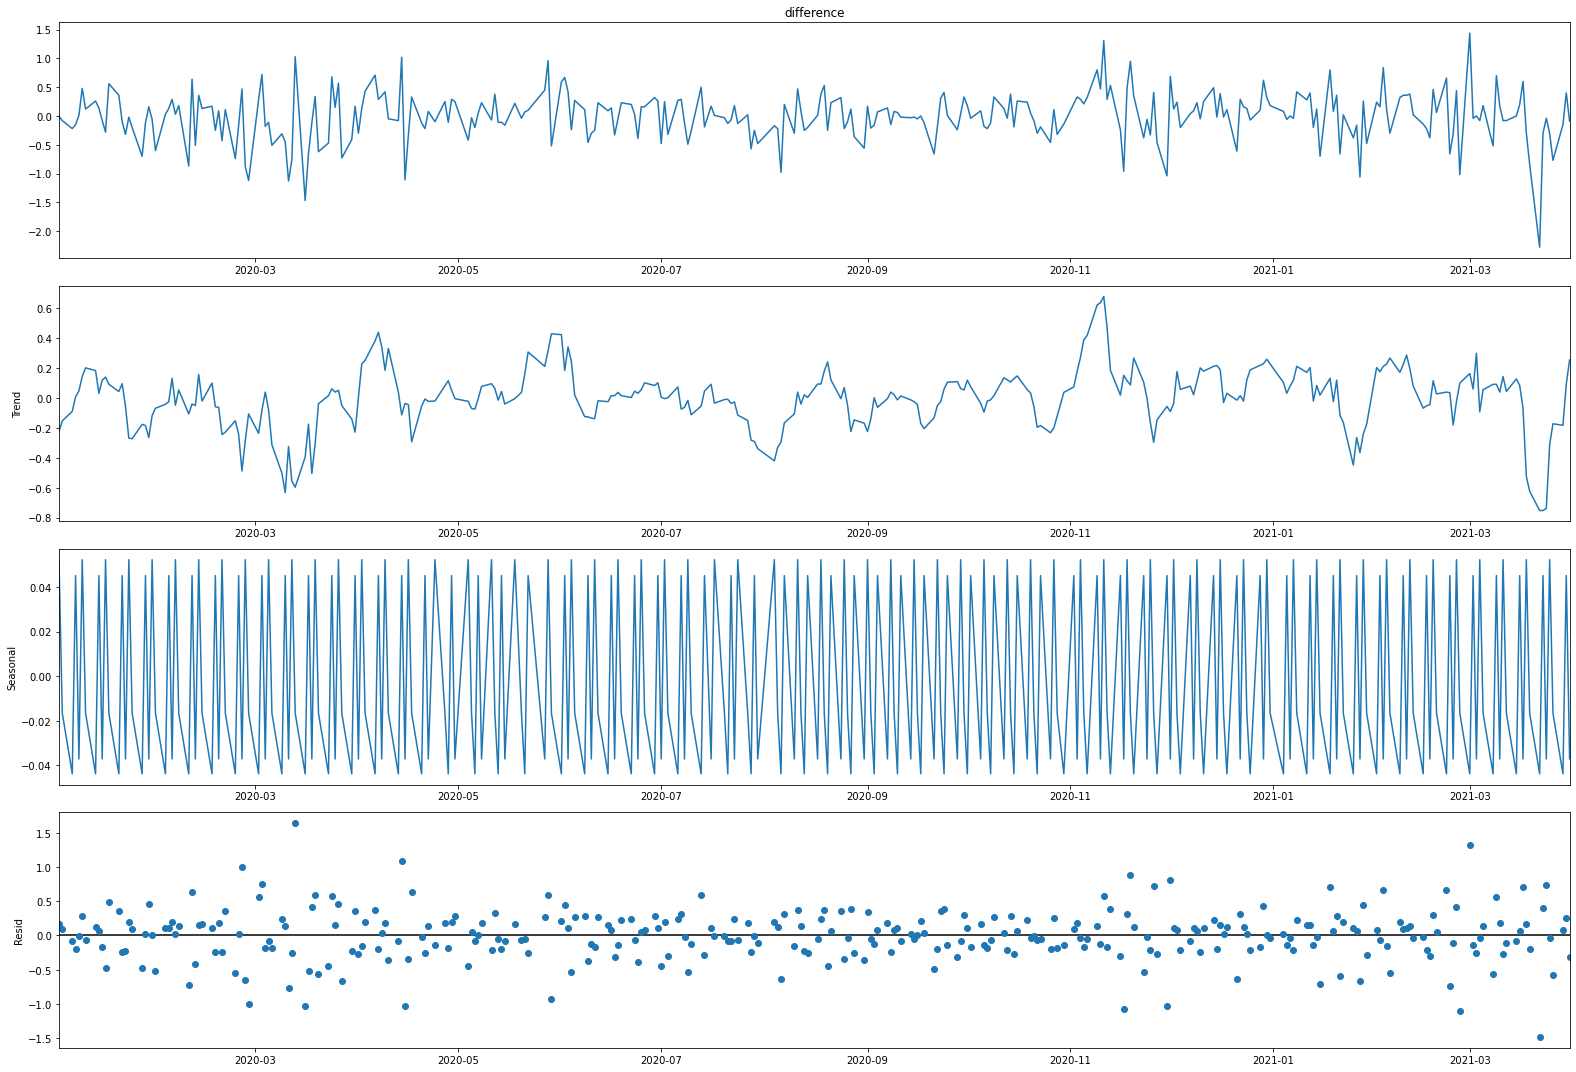

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'




##################################################


 SRART THE TRAINING


##################################################


Epoch 1/1000
 8/13 [=================>............] - ETA: 0s - loss: 0.4478 
Epoch 00001: val_loss improved from inf to 0.17779, saving model to KCHOL_LSTM_MODEL.h5
13/13 [==============================] - 3s 63ms/step - loss: 0.3463 - val_loss: 0.1778
Epoch 2/1000
 8/13 [=================>............] - ETA: 0s - loss: 0.1435
Epoch 00002: val_loss improved from 0.17779 to 0.16044, saving model to KCHOL_LSTM_MODEL.h5
13/13 [==============================] - 0s 11ms/step - loss: 0.1460 - val_loss: 0.1604
Epoch 3/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.1204
Epoch 00003: val_loss improved from 0.16044 to 0.13077, saving model to KCHOL_LSTM_MODEL.h5
13/13 [==============================] - 0s 10ms/step - loss: 0.1258 - val_loss: 0.1308
Epoch 4/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.1265
Epoch 00004: val_loss imp

,Model,Test Score
0,KCHOL ARIMA Model,0.375180
1,KCHOL SARIMA Model,0.375332
2,KCHOL ARIMAX Model,0.894328
3,KCHOL LSTM Model,0.167518


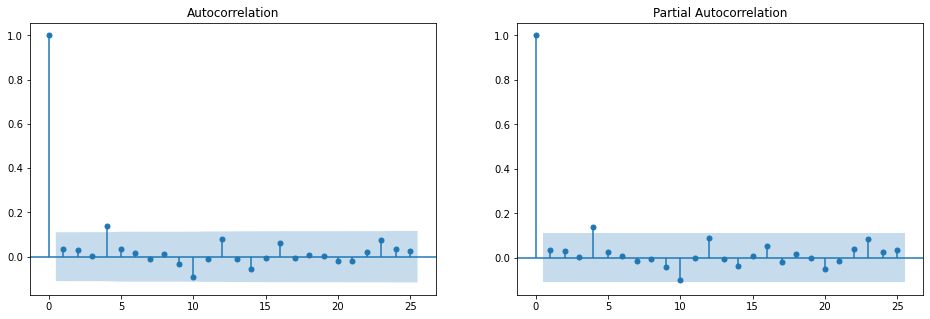

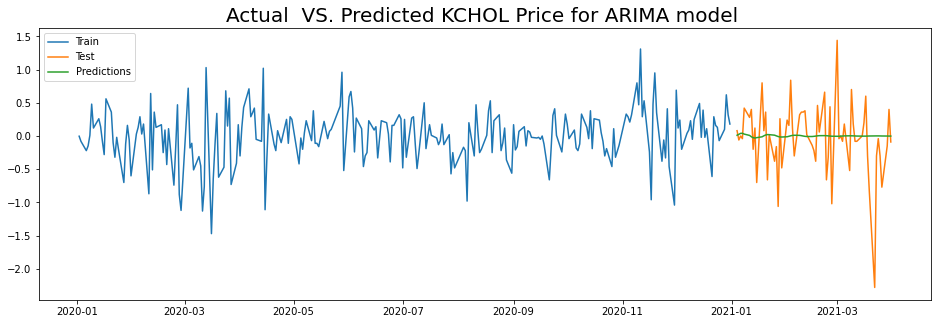

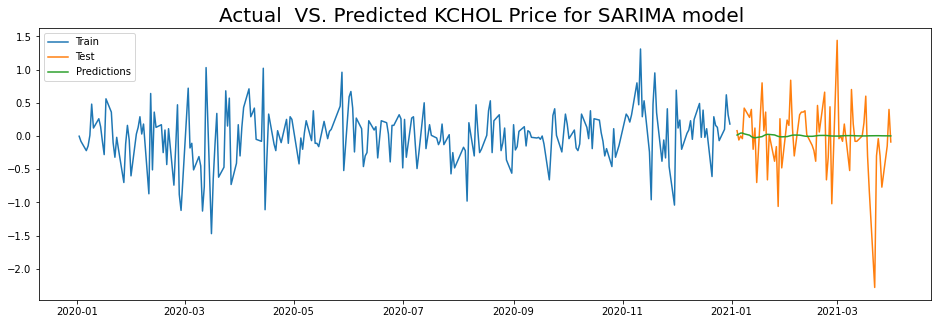

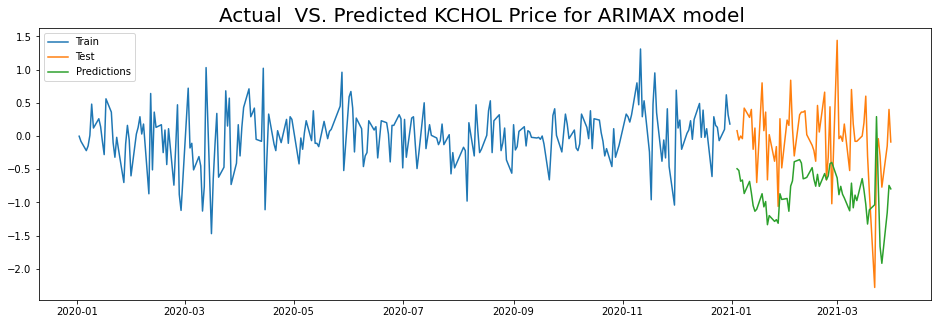

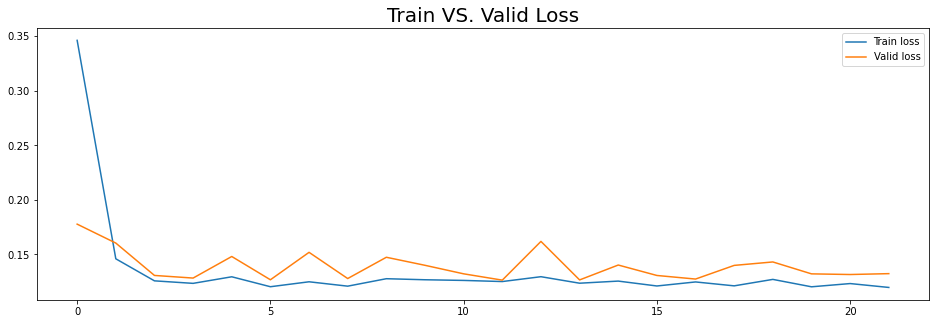

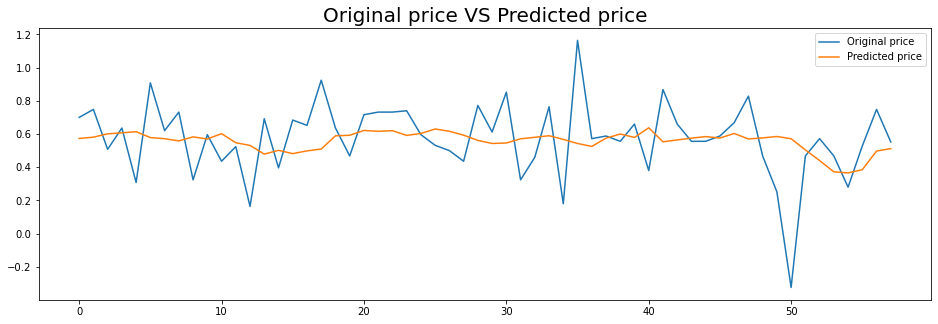

In [6]:
KCHOL, data_name = analysis('KCHOL', 1)
KCHOL_models_scores = model(KCHOL, data_name)
KCHOL_models_scores

---

The first 5 rows of the MNHD data set: 

                  Date Price  Open  High   Low   Vol.  Change %
0  2021-03-31 00:00:00  3.75  3.74  3.82  3.71  1.57M    0.0054
1  2021-03-30 00:00:00  3.73  3.71  3.76  3.67  3.43M    0.0081
2  2021-03-29 00:00:00   3.7  3.69  3.73  3.68  1.25M   -0.0027
3  2021-03-28 00:00:00  3.71  3.76  3.76  3.68  2.34M    0.0000
4  2021-03-25 00:00:00  3.71  3.62  3.78  3.59  2.50M    0.0137

**************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.43075156928215735
The price values after difference: 
The time series is stationary and the p-value is 1.2158934574343581e-26


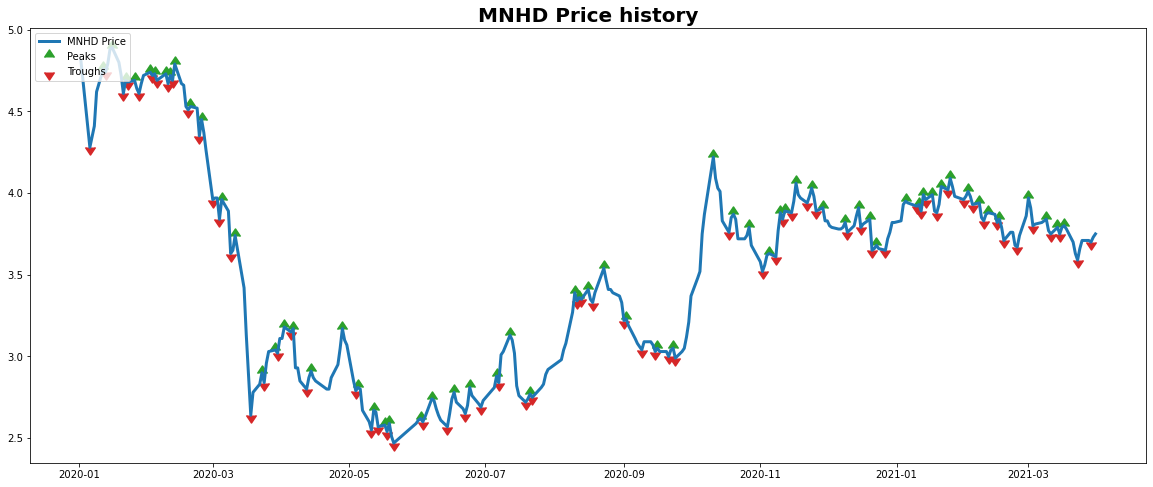

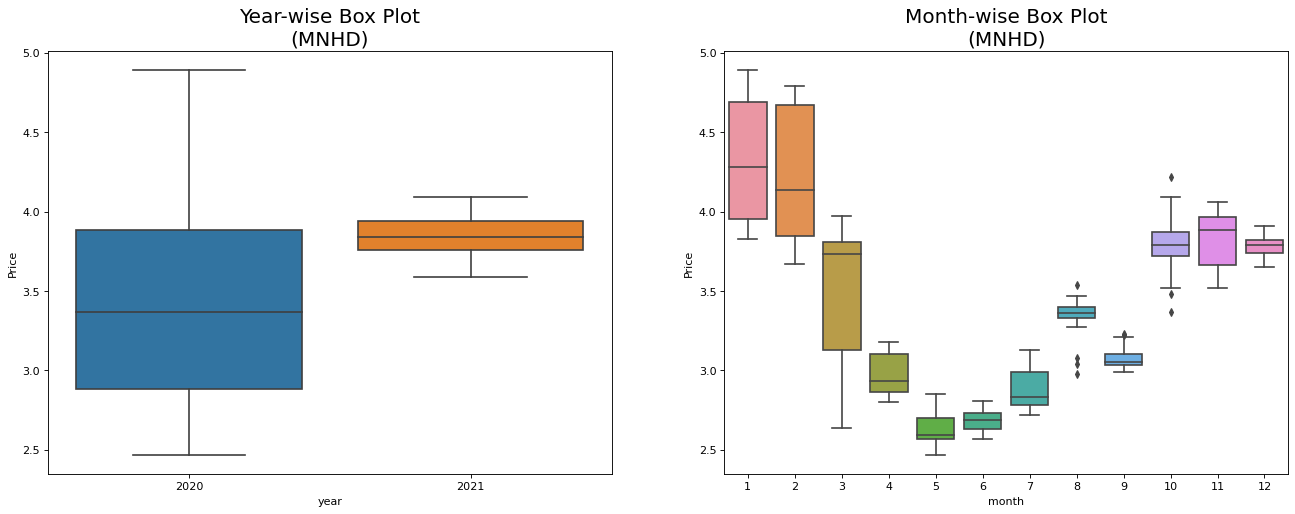

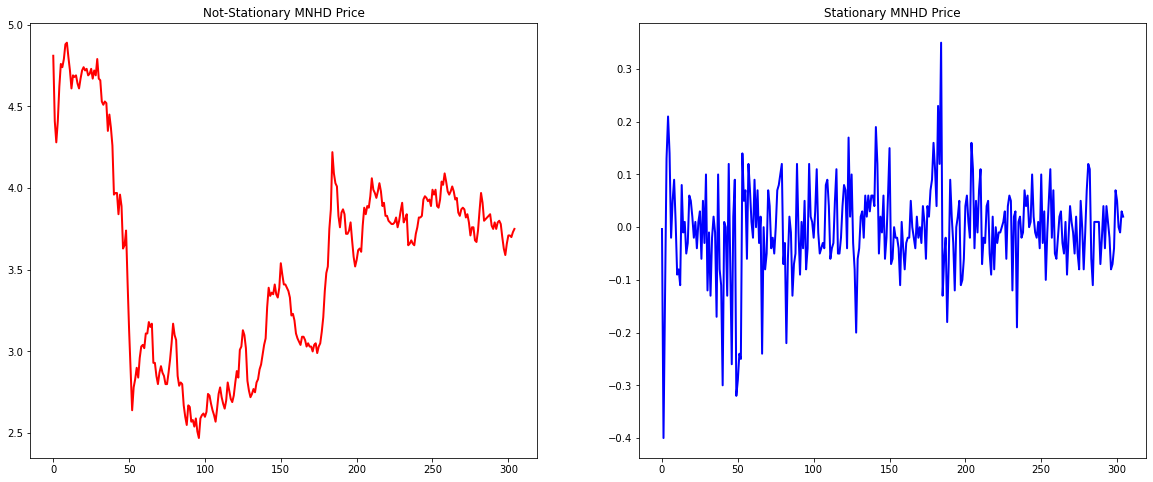

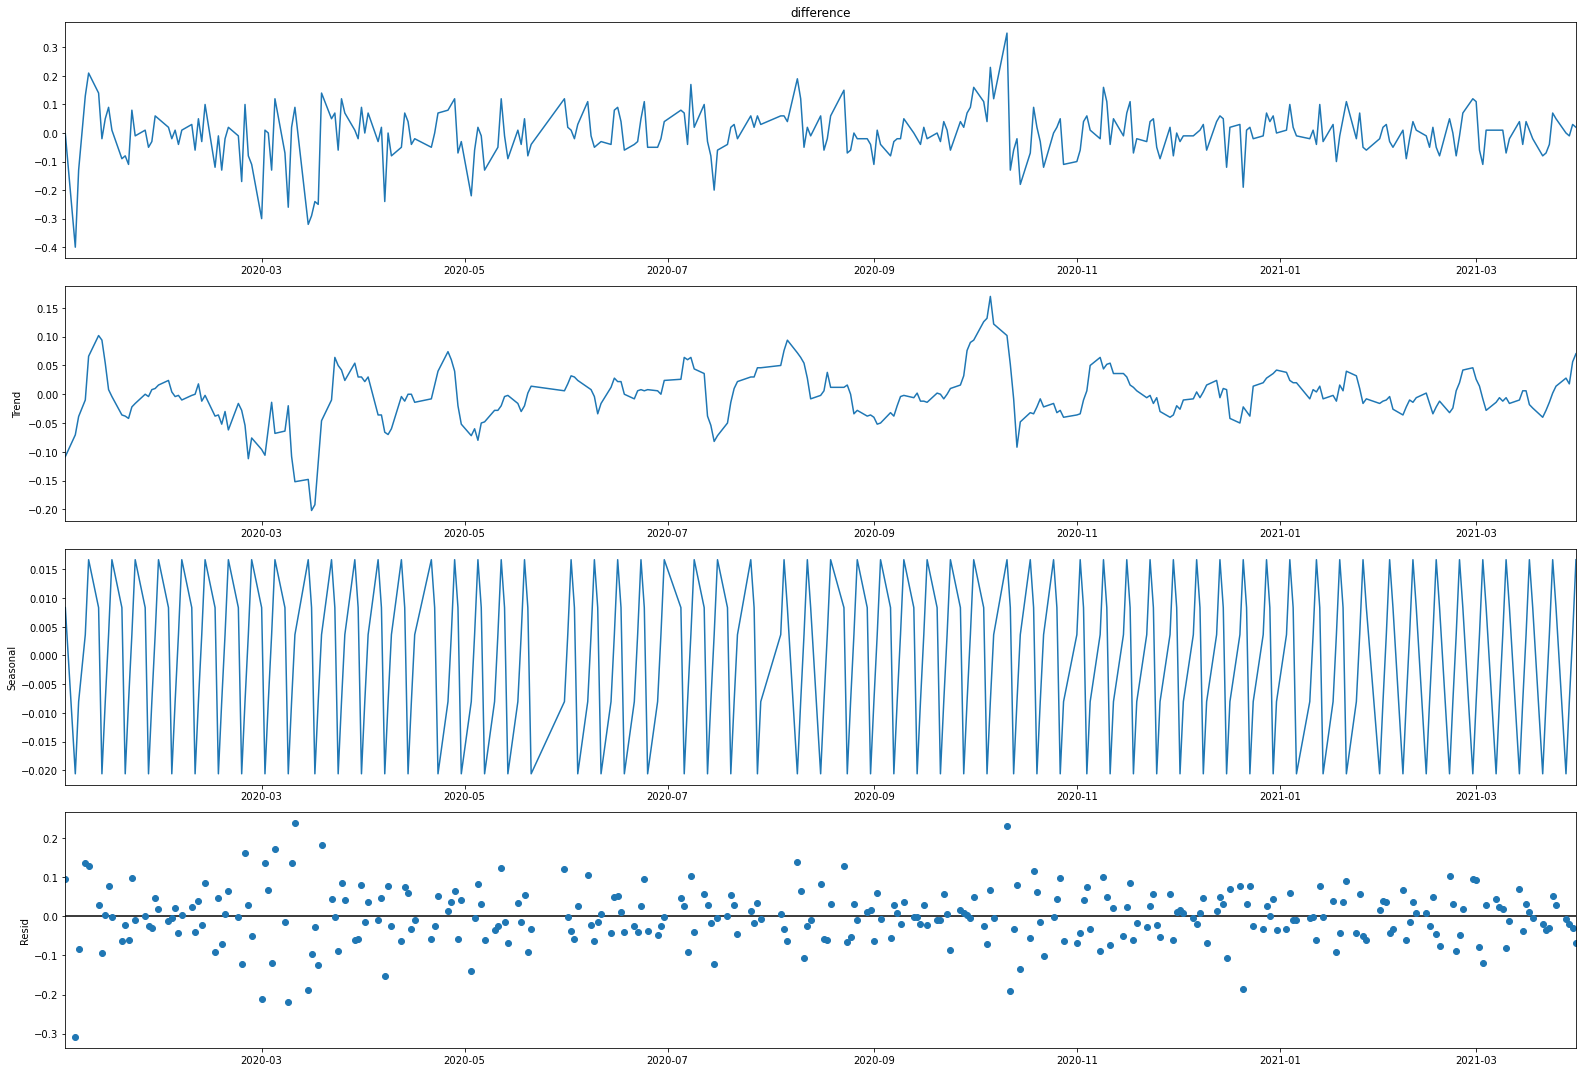

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'




##################################################


 SRART THE TRAINING


##################################################


Epoch 1/1000
 9/12 [=====================>........] - ETA: 0s - loss: 0.3385 
Epoch 00001: val_loss improved from inf to 0.11750, saving model to MNHD_LSTM_MODEL.h5
12/12 [==============================] - 3s 60ms/step - loss: 0.2924 - val_loss: 0.1175
Epoch 2/1000
10/12 [========================>.....] - ETA: 0s - loss: 0.1374
Epoch 00002: val_loss improved from 0.11750 to 0.09450, saving model to MNHD_LSTM_MODEL.h5
12/12 [==============================] - 0s 10ms/step - loss: 0.1315 - val_loss: 0.0945
Epoch 3/1000
 9/12 [=====================>........] - ETA: 0s - loss: 0.1091
Epoch 00003: val_loss improved from 0.09450 to 0.08223, saving model to MNHD_LSTM_MODEL.h5
12/12 [==============================] - 0s 11ms/step - loss: 0.1097 - val_loss: 0.0822
Epoch 4/1000
10/12 [========================>.....] - ETA: 0s - loss: 0.1071
Epoch 00004: val_loss improv

,Model,Test Score
0,MNHD ARIMA Model,0.042419
1,MNHD SARIMA Model,0.042531
2,MNHD ARIMAX Model,0.151058
3,MNHD LSTM Model,0.065553


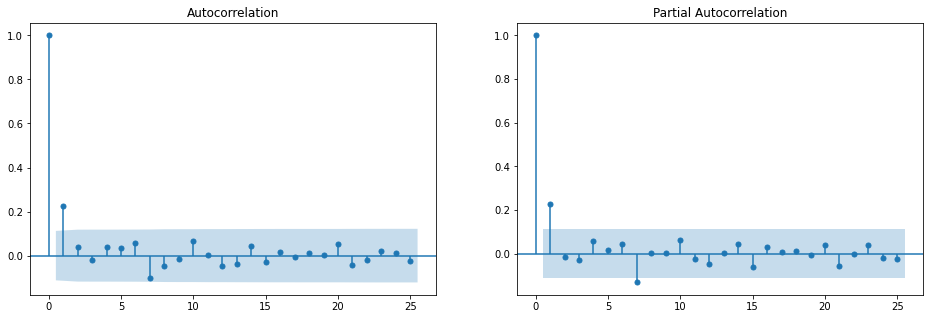

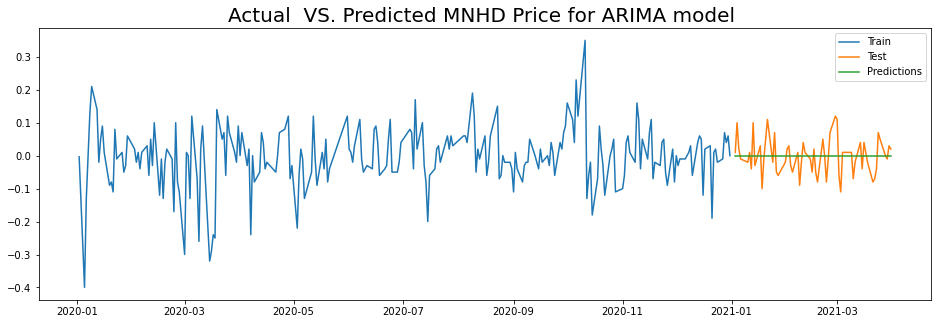

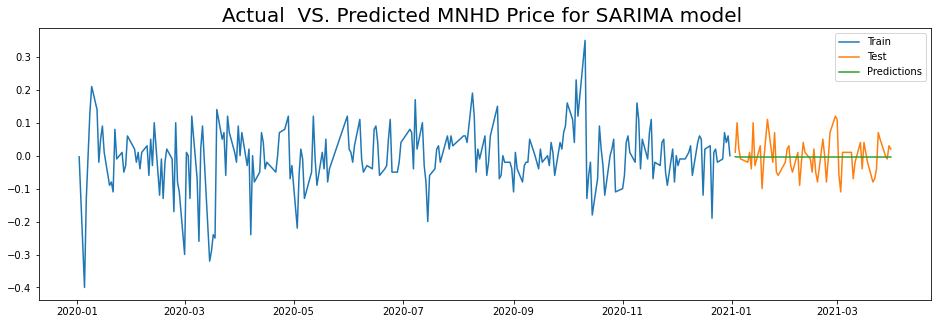

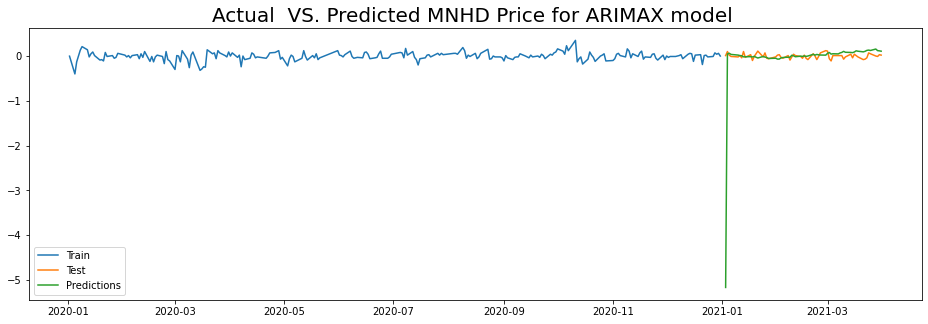

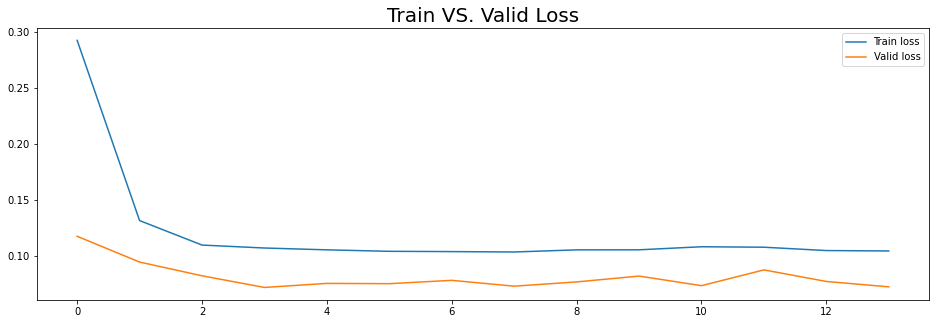

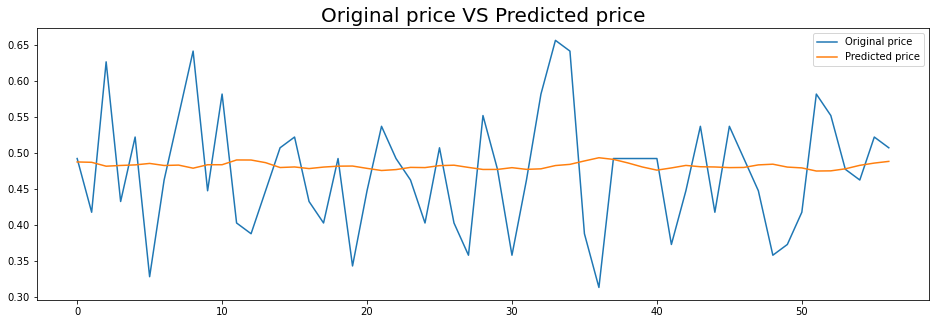

In [7]:
MNHD, data_name = analysis('MNHD', 2)
MNHD_models_scores = model(MNHD, data_name)
MNHD_models_scores

---

The first 5 rows of the BEEF3 data set: 

                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00   10.2  10.35   10.4  10.12   7.77M   -0.0154
1  2021-03-30 00:00:00  10.36  10.41  10.62   10.3   9.93M   -0.0105
2  2021-03-29 00:00:00  10.47   9.85   10.5   9.81  22.04M    0.0651
3  2021-03-26 00:00:00   9.83    9.8   9.94    9.7   5.11M    0.0031
4  2021-03-25 00:00:00    9.8  10.01  10.01   9.66   8.88M   -0.0151

**************************************************************************************************************
The original price values: 
The time series is not stationary and the p-value is 0.1839062370155748
The price values after difference: 
The time series is stationary and the p-value is 6.858473426851442e-13


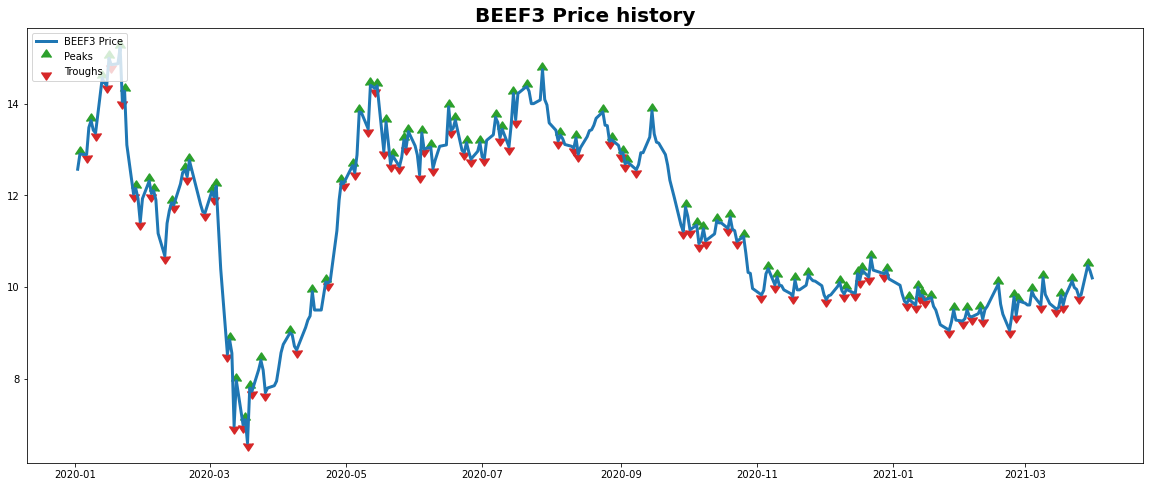

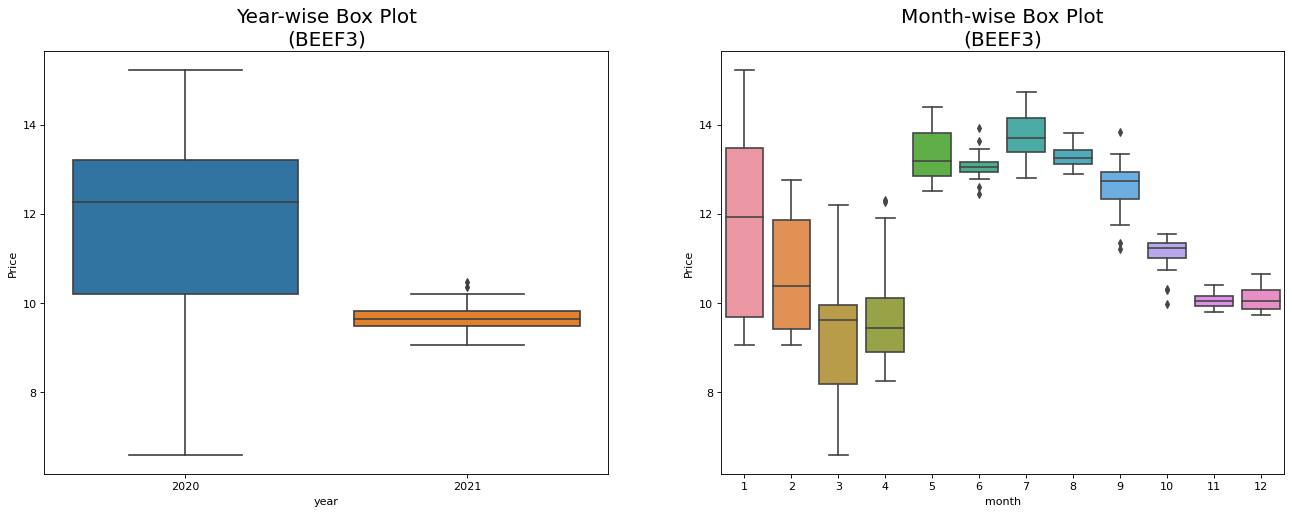

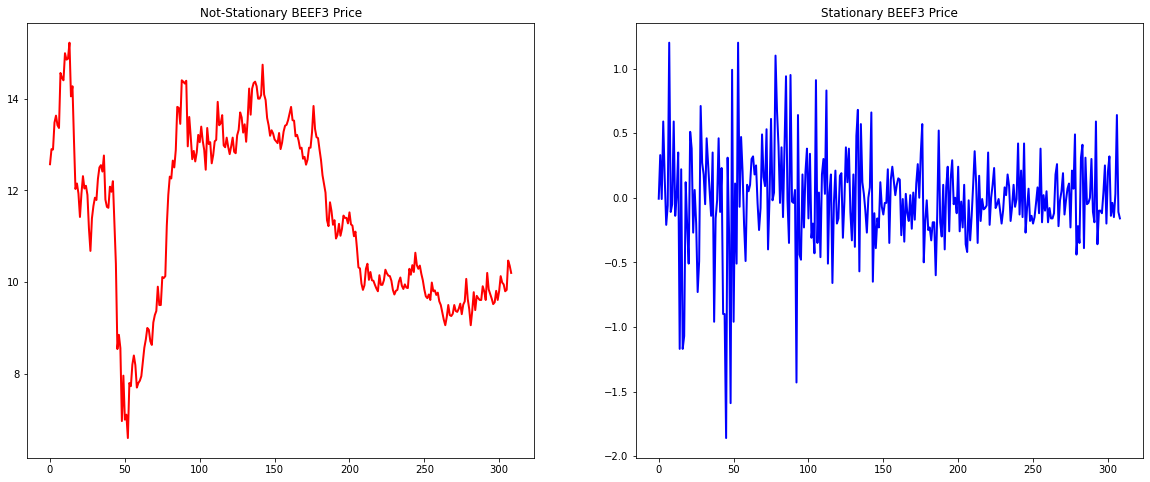

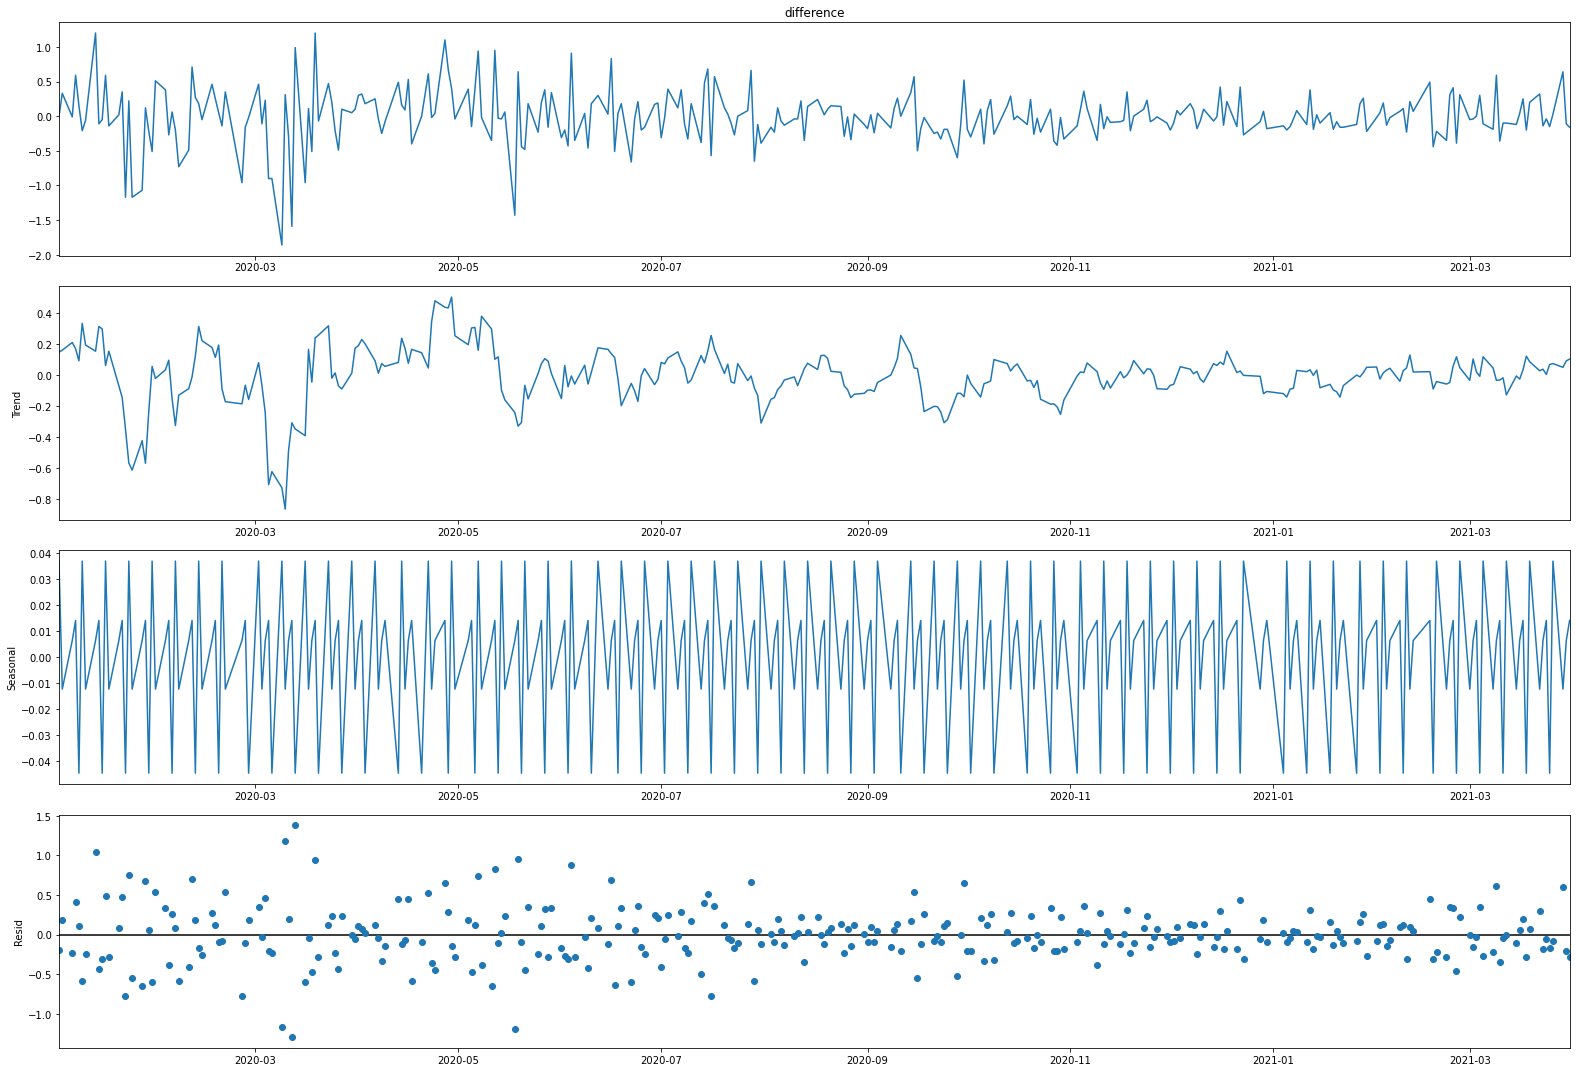

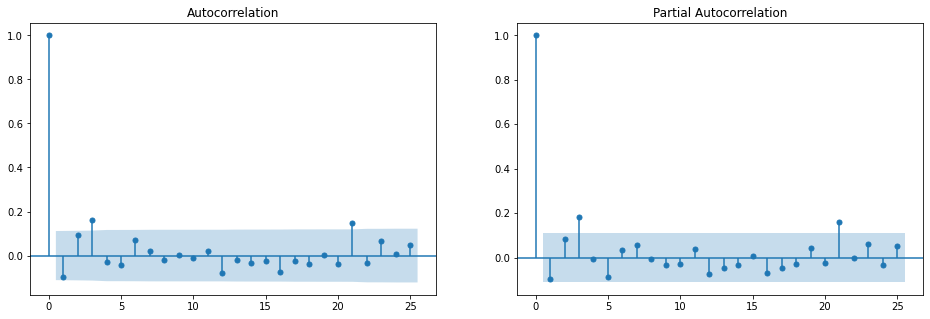

In [8]:
BEEF3, data_name = analysis('BEEF3', 3)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'




##################################################


 SRART THE TRAINING


##################################################


Epoch 1/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.4444 
Epoch 00001: val_loss improved from inf to 0.19204, saving model to BEEF3_LSTM_MODEL.h5
13/13 [==============================] - 3s 57ms/step - loss: 0.3588 - val_loss: 0.1920
Epoch 2/1000
 7/13 [===============>..............] - ETA: 0s - loss: 0.1749
Epoch 00002: val_loss improved from 0.19204 to 0.07903, saving model to BEEF3_LSTM_MODEL.h5
13/13 [==============================] - 0s 12ms/step - loss: 0.1536 - val_loss: 0.0790
Epoch 3/1000
 9/13 [===================>..........] - ETA: 0s - loss: 0.1231
Epoch 00003: val_loss improved from 0.07903 to 0.05755, saving model to BEEF3_LSTM_MODEL.h5
13/13 [==============================] - 0s 11ms/step - loss: 0.1211 - val_loss: 0.0576
Epoch 4/1000
 8/13 [=================>............] - ETA: 0s - loss: 0.1213
Epoch 00004: val_loss imp

,Model,Test Score
0,BEEF3 ARIMA Model,0.184663
1,BEEF3 SARIMA Model,0.183052
2,BEEF3 ARIMAX Model,0.790703
3,BEEF3 LSTM Model,0.094972


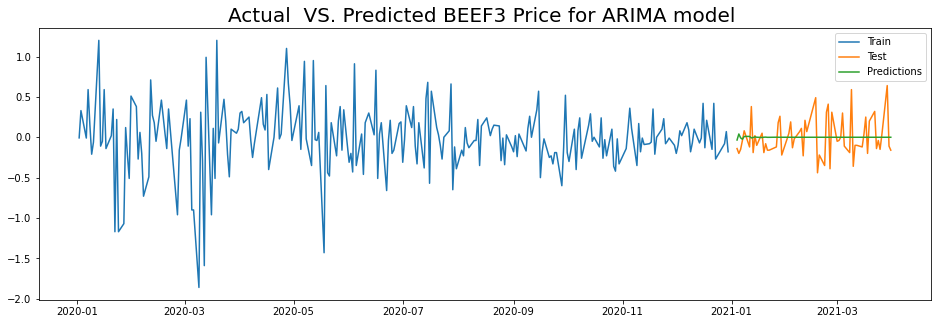

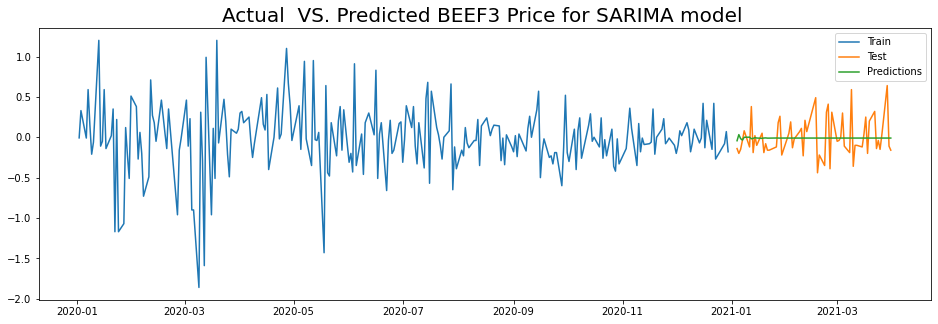

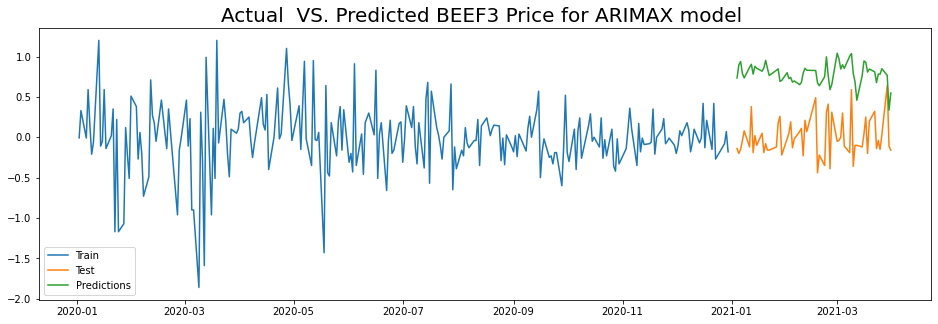

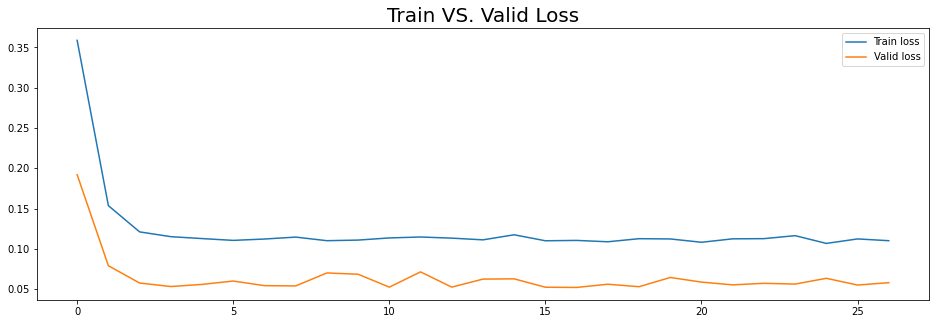

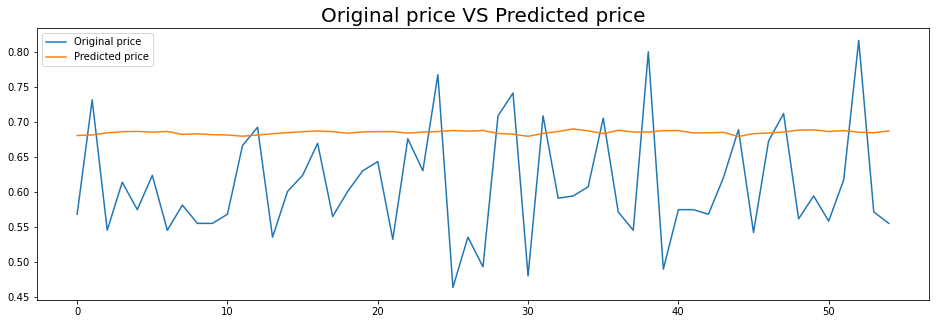

In [10]:
BEEF3_models_scores = model(BEEF3, data_name)
BEEF3_models_scores

---

In [ ]:
PAMP, data_name = analysis('PAMP', 4)
PAMP_model = model(PAMP, data_name)

---

In [ ]:
CCB, data_name = analysis('CCB', 5)
CCB_model = model(CCB, data_name)

---

In [ ]:
IMPJ, data_name = analysis('IMPJ', 6)
IMPJ_model = model(IMPJ, data_name)

---

In [ ]:
DSMCL, data_name = analysis('DSMCL', 7)
DSMCL_model = model(DSMCL, data_name)

---